# Modelado del problema

En este práctico no veremos métodos en sí, sino que daremos pequeños ejemplos ilustrativos de los distintos aspectos conceptuales en torno al tema de modelado. Como ejemplo en este ejercicio usaremos un tipo de dato que resulta engañosamente sencillo hoy en día dada la familiaridad que todos tenemos con ellos: las imágenes digitales.




In [1]:
!pip install --quiet mglearn
#
# importación
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng

import os
import pandas as pd
import mglearn

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


## Abstracción de la realidad

La pipa de Magritte nos hace tomar conciencia de la diferencia entre un objeto real y su representación en forma de imagen. En su versión original, la pipa es un cuadro.

Incluso si observamos una pipa _real_, lo que reciben nuestros ojos es un torrente complejísimo de ondas electromagnéticas originadas en el Sol y reflejadas sobre la superficie del verdadero objeto.

## Imágenes digitales

Dentro de una computadora, una imagen no es más que una matriz (arreglo bidimensional) de números. Cada número en el arreglo indica la luminosidad de un área rectangular de la imagen a la que llamamos _pixel_ (picture element). Típicamente estos números van del $0$ (oscuridad total) a $255$ (máxima luminosidad). Cuando se trata de imágenes a color, cada pixel es representado por _tres_ números: intensidad de rojo, de verde y de azul (RGB). Combinando distintas intensidades logramos una cierta gama de colores (llamada _gamut_ en inglés).

La gama de colores que se representa, sin embargo, depende del dispositivo en donde se muestra: no es lo mismo el verde puro $(0,255,0)$ en un monitor, que en una impresora, que en un proyector.




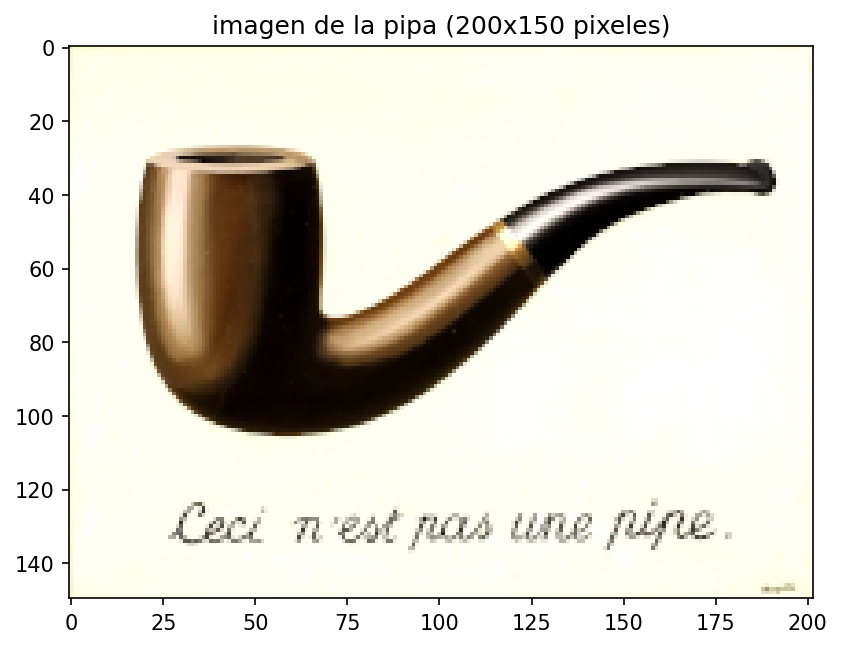



Dimensiones de la imagen: (150, 202, 3)




In [2]:
!wget -c --quiet  https://iie.fing.edu.uy/~nacho/data/images/pipa_chiquita.png
#
# cargamos la imagen
#
img = plt.imread('pipa_chiquita.png')
#
# veamos la imagen
#
plt.imshow(img)
plt.title('imagen de la pipa (200x150 pixeles)')
plt.show()
#
# y cómo está hecha por dentro?
#
print('\n==========================================\n')
print('Dimensiones de la imagen:',img.shape)
print('\n==========================================\n')


### La pipa digital

Vemos que la pipa es una matriz de  150 x 202 x 3.
Es una matriz que en lugar de requerir _dos_ coordenadas (fila, columna),
requiere _tres_ coordenadas para especificar un valor.

La última coordenada especifica qué _canal_ de color queremos ver.
El primer canal ($0$) corresponde al rojo. El segundo ($1$) al verde,
y el último al azul ($2$). Podemos extraer esos canales y verlos por separado a ver cómo son; lo que veremos es qué tanta intensidad de, por ejemplo, rojo hay en cada pixel de la imagen.


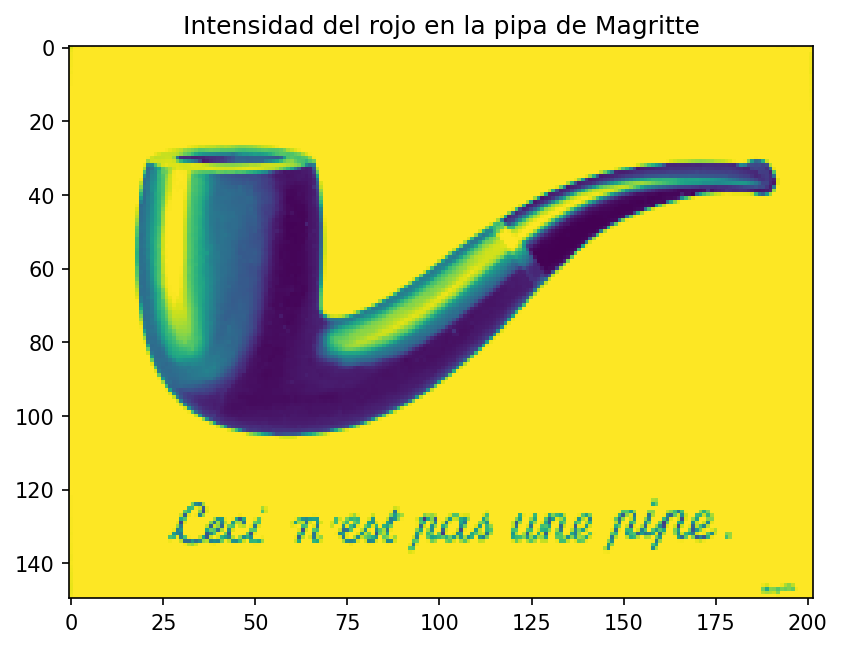

In [3]:
img_rojo = img[:,:,0] # esto se lee así: dame todas las filas, y todas las columnas, del canal 0
plt.imshow(img_rojo)
plt.title('Intensidad del rojo en la pipa de Magritte')
plt.show()

### No hay nada rojo?

Dijimos que íbamos a ver el canal rojo, pero cuando lo fuimos a mostrar obtuvimos una imagen con colores absurdos entre amarillos y azules. Qué significa eso?

Lo que pasa es que al trabajar con un sólo canal se pierde la idea de _color_ tal como la conocemos naturalmente. Ante esta situación, `matplotlib` nos muestra un _pseudocolorizado_ de la imagen, en donde a cada intensidad se le hace corresponder un color dentro de una _paleta_. Para ver mejor esto podemos mostrar la paleta y su correspondencia con los colores a un lado de la imagen


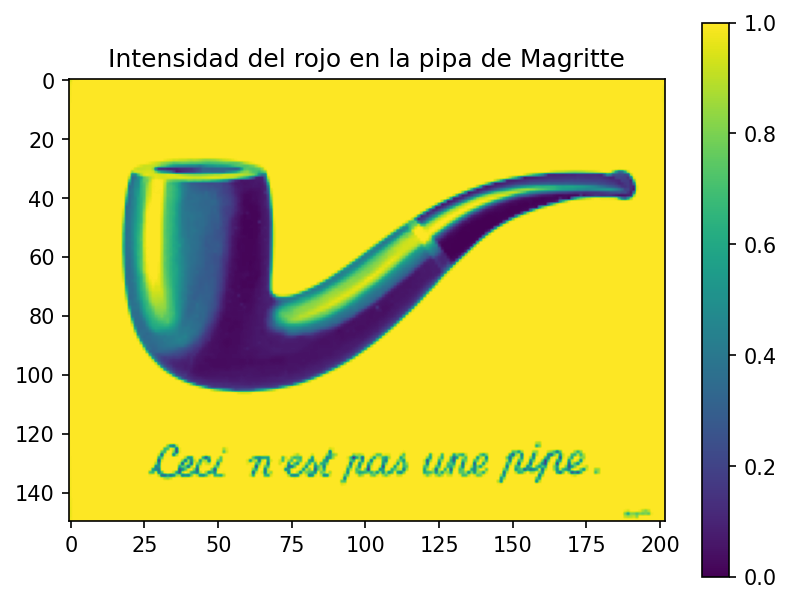

In [4]:
plt.imshow(img_rojo)
plt.colorbar()
plt.title('Intensidad del rojo en la pipa de Magritte')
plt.show()

### Rango de intensidades

Si miramos con atención, podemos ver que la barra de colores tiene como valor máximo $1$ y no $255$ como dijimos. Lo que sucede es que `matplotlib`  representa los colores como números reales entre $0$ y $1$: de nuevo $0$ es la intensidad mínima y $1$ la máxima.

La paleta de colores que vemos a su lado se llama _viridis_. Hay muchas paletas de colores. Lo que se busca con el _pseudocolorizado_ es mejorar nuestra capacidad de ver diferencias en las imágenes, ya que somos más sensibles a los cambios sutiles de tonalidad que sólo a la intensidad. Si queremos ver la imagen con otra paleta, podemos especificarla como se muestra abajo.

---

**Ejercicio**: cambie 'jet' abajo por alguna otra paleta de las disponibles en https://matplotlib.org/stable/gallery/color/colormap_reference.html

---



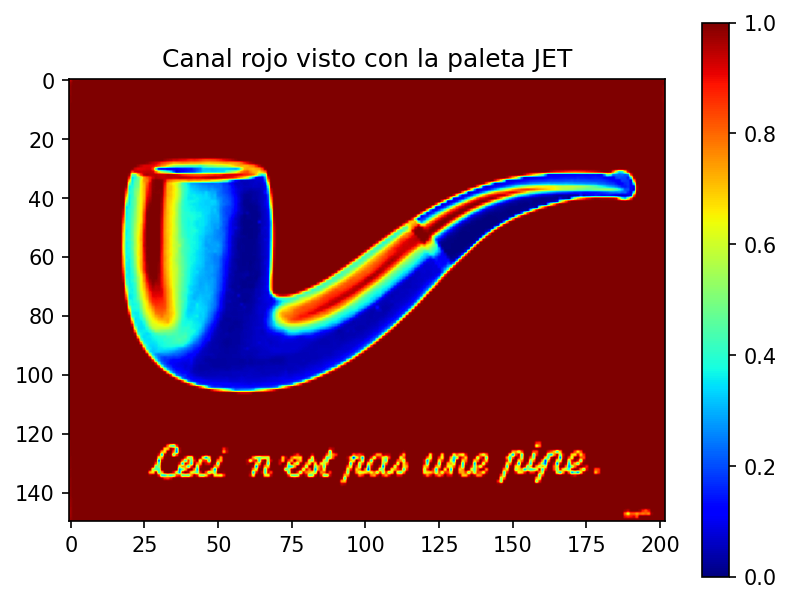

In [5]:
# cmap quiere decir 'color map'
plt.imshow(img_rojo,cmap='jet')
plt.colorbar()
plt.title('Canal rojo visto con la paleta JET')
plt.show()


## Al rojo lo que es del rojo

Finalmente, para verlo de la manera más realista posible.
Veamos entonces el canal rojo con una paleta de rojos.
Increíblemente, no hay una paleta de 'rojos', 'azules' y 'verdes' en Matplotlib. Podemos crear una nosotros. No es díficil. Abajo vemos cómo, y ya de paso mostramos los tres canales.


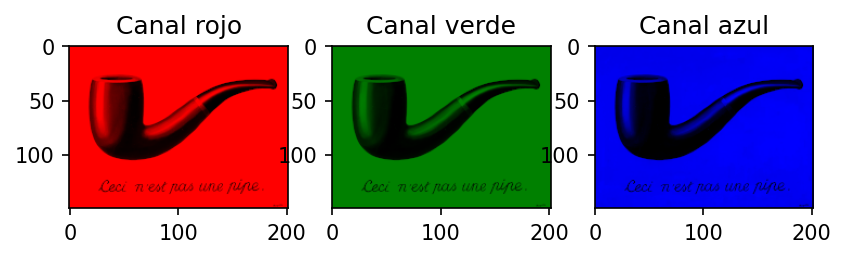

In [6]:
from matplotlib.colors import LinearSegmentedColormap
rojos  = LinearSegmentedColormap.from_list(name="rojos",colors=["black","red"])
verdes = LinearSegmentedColormap.from_list(name="rojos",colors=["black","green"])
azules = LinearSegmentedColormap.from_list(name="rojos",colors=["black","blue"])

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_rojo,cmap=rojos)
plt.title('Canal rojo')
plt.subplot(1,3,2)
plt.imshow(img[:,:,1],cmap=verdes) # img[:,:,1] -> canal verde
plt.title('Canal verde')
plt.subplot(1,3,3)
plt.imshow(img[:,:,2],cmap=azules)
plt.title('Canal azul')
plt.show()


## Imágenes como matrices

Por estar moldeadas de acuerdo a nuestra percepción, las imágenes digitales son fácilmente analizables por seres humanos. Sin embargo, tal como se presentan de manera cruda, como una matriz de números, las imágenes digitales son datos extremadamente difíciles de interpretar por una computadora. Variaciones que a nosotros nos resultan triviales, como un cambio de luminosidad, generan diferencias _enormes_ entre las representaciones digitales.

Primero que nada, recortemos un trozo de la imagen de la  pipa y veamos los números con los que se representa.



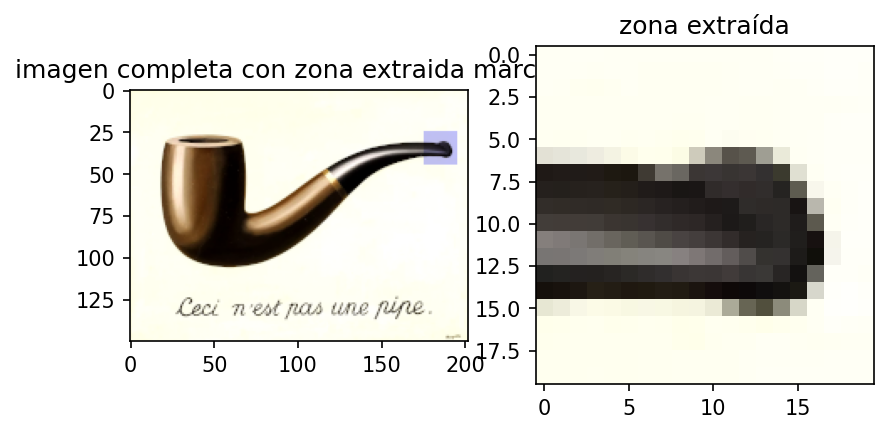

Matriz de números correspondiente a la boquilla
[[[1.         1.         0.95686275]
  [1.         1.         0.95686275]
  [1.         1.         0.9607843 ]
  ...
  [1.         1.         0.9764706 ]
  [1.         1.         0.9764706 ]
  [1.         1.         0.9764706 ]]

 [[1.         1.         0.95686275]
  [1.         1.         0.95686275]
  [1.         1.         0.95686275]
  ...
  [1.         1.         0.9764706 ]
  [1.         1.         0.9764706 ]
  [1.         1.         0.96862745]]

 [[1.         1.         0.95686275]
  [1.         1.         0.9529412 ]
  [1.         1.         0.9411765 ]
  ...
  [1.         1.         0.972549  ]
  [1.         1.         0.972549  ]
  [1.         1.         0.96862745]]

 ...

 [[1.         1.         0.92941177]
  [1.         1.         0.93333334]
  [1.         1.         0.9372549 ]
  ...
  [1.         1.         0.9490196 ]
  [1.         1.         0.9529412 ]
  [1.         1.         0.9529412 ]]

 [[1.         1.         0

In [7]:
img_marcada = img.copy()

boquilla = img[25:45, 175:195, :] # se lee: filas de la 35 a la 45, columnas de la 175 a la 195, todos los canales
#
# truco para pintar zona extraída
#
img_marcada[25:45, 175:195,:2] *= 0.75

plt.subplot(1,2,1)
plt.imshow(img_marcada)
plt.title('imagen completa con zona extraida marcada')
plt.subplot(1,2,2)
plt.imshow(boquilla)
plt.title('zona extraída')
plt.show()
print('Matriz de números correspondiente a la boquilla')
print(boquilla)

### Difícil para Sagitario

No es muy intuitivo, verdad? Lo que vemos arriba es la matriz RGB con las tres componentes de color de la boquilla de la pipa. Para facilitarnos la vida, veamos sólo la componente verde, que es lo que más se parece a una imagen en tonos de gris

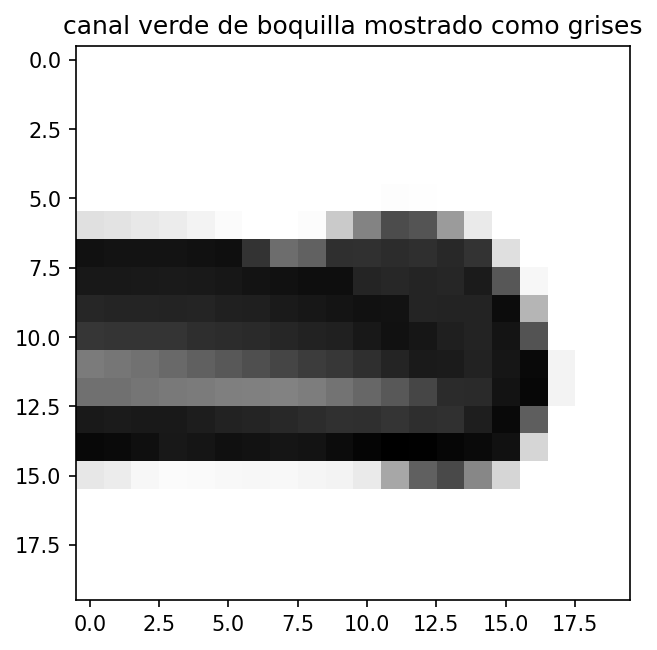

Matriz de números correspondiente al canal verde
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.       

In [8]:
boq_verde = boquilla[:,:,1]
plt.imshow(boq_verde,cmap='gray') # paleta de grises
plt.title('canal verde de boquilla mostrado como grises')
plt.show()
print('Matriz de números correspondiente al canal verde')
print(boq_verde)

### Conocimiento previo

Esperamos haberlos convencido a esta altura de que, sin experiencia previa, hacer sentido de una imagen a partir de una matriz de números _no_ es algo trivial! Es aquí en donde entra el conocimiento previo del experto, y es algo _fundamental_ a tener en cuenta en todo problema de aprendizaje.

Para empezar, es bastante confuso interpretar números con muchos decimales. Vamos a tratar de aliviar esto representando las intensidades de los pixeles entre $0$ y $99$



<ipython-input-9-839cc1b5f324>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boq_verde_100 = np.round(99*boq_verde).astype(np.int)  # redondeamos y convertimos a enteros


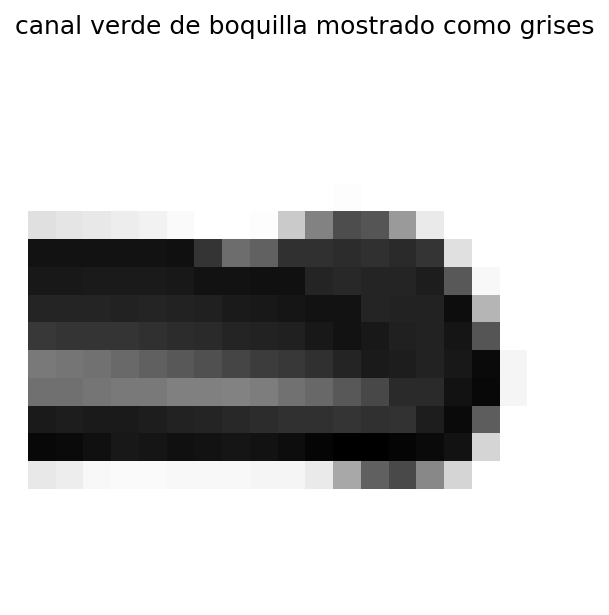

Matriz de números correspondiente al canal verde
[[99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99 99 99 99 98 99 99 99 99 99 99 99 99]
 [87 89 90 92 94 97 99 99 98 79 52 32 35 61 91 99 99 99 99 99]
 [10 10 10 10 10  9 23 44 40 21 21 20 21 19 23 87 99 99 99 99]
 [12 12 13 13 13 12 10 10  9  9 17 18 17 17 14 36 96 99 99 99]
 [17 17 17 16 17 16 15 13 12 11 10 10 17 16 16  8 71 99 99 99]
 [24 23 23 23 21 20 19 17 16 15 12 10 12 15 16 11 35 99 99 99]
 [49 47 46 43 39 36 33 29 26 24 21 17 13 14 16 12  7 95 99 99]
 [45 45 47 49 49 51 51 52 50 46 42 36 30 19 19 10  6 95 99 99]
 [13 14 13 13 14 16 17 18 20 21 21 23 21 22 14  7 38 99 99 99]
 [ 6  7  9 12 11  9 10 11 10  8  5  3  3  5  7 10 83 99 99 99]
 [90 9

In [9]:
boq_verde_100 = np.round(99*boq_verde).astype(np.int)  # redondeamos y convertimos a enteros

plt.imshow(boq_verde_100,cmap='gray') # paleta de grises
plt.axis('off')
plt.title('canal verde de boquilla mostrado como grises')
plt.show()
print('Matriz de números correspondiente al canal verde')
print(boq_verde_100)

Ya viendo la matriz de esa manera uno puede empezar a relacionar la imagen con los números. Vemos por ejemplo que el fondo blanco (máxima intensidad) corresponde al número más alto en la matriz, $99$. Vemos que la boquilla, que es oscura, se representa con números muy bajos, siendo mínimos en el borde inferior del objeto, como uno esperaría ya que está del lado de la sombra.

De este tipo de observaciones podemos, por ejemplo, inferir reglas que nos ayuden a identificar aspectos relevantes de una imagen.


---

**Ejercicio en clase**

*   Intente describir las siguientes estructuras visibles en la imagen en términos de la matriz de números:
    *   zonas lisas
    *   bordes
    *   cambios suaves de luminosidad
*   Qué otro tipo de cosas podríamos inferir y cómo se le ocurre que podría expresarse en términos de la representación numérica de la imagen (la matriz de números)?

---



## Naturaleza del problema

Es fundamental entender algunos aspectos de la naturaleza del problema para poder tratarlo de manera efectiva. En particular, es importante ser consciente de las limitaciones. Uno de los puntos en donde esto más se manifiesta es en el proceso de adquisición de datos, algo que invariablemente nos muestra una visión muy parcial e incompleta de la realidad. En el caso de las imágenes digitales, hay algunas cosas obvias. Por ejemplo:

*   Hay regiones de la escena que no podemos ver
*   No podemos distinguir detalles en zonas oscuras
*   Toda cámara tiene una capacidad limitada para absorber luz; más allá de eso simplemente _satura_  y todo se ve blanco; esto hace que se pierda detalle en zonas demasiado iluminadas

---
**Ejercicio**
*   Mencione al menos tres otras posibles limitantes más
---



# Dependencias y causalidades

A la hora de modelar un problema, un elemento importante a tener en cuenta son las dependencias entre las variables de entrada.
Estas dependencias pueden ser de índole causal, o no (determinar la causalidad es un problema muy difícil e interesante en el que
desafortunadamente no podremos entrar en este curso).

En todo caso, tener en cuenta esas dependencias permite extraer saliencias de los datos.

## Dependencias espaciales

Por ejemplo, supongamos que tenemos cientos de sensores de temperatura repartidos
en un bosque para prevenir incendios: es esperable que la temperatura de dos sensores cercanos sea muy similar; podemos deducir que esas variables no son independientes.

Otro ejemplo típico se da, nuevamente, en las imágenes digitales: en una imagen natural es muy común observar regiones en donde la luminosidad varía lentamente (por ejemplo, cielo o superficie de objetos suaves).
De ahí que un modelo muy común en el que se basan virtualmente _todos_ los algoritmos de compresión de imágenes (JPG, PNG, etc.) sea que los pixeles vecinos en imágenes digitales tiendan a ser muy parecidos entre sí.

Para ver eso, vamos a calcular la _derivada discreta_ de la imagen de la pipa en el sentido horizontal. Esto lo que hace es restar a cada pixel su vecino de la izquierda:


<ipython-input-10-f5a436cdea27>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pipa = (255*pipa).astype(np.int) # enteros entre 0 y 255


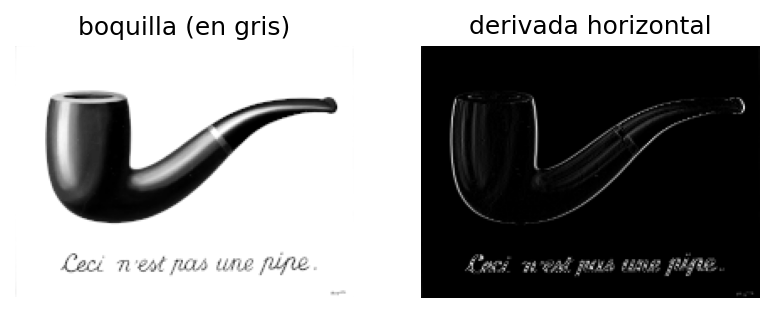

Matriz de números de la derivada
[[16  1  0 ...  1  0  4]
 [ 9  0  0 ...  0  0  1]
 [ 8  0  0 ...  0  0  6]
 ...
 [12  0  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  0  1]]
Promedio de la magnitud de la imagen 215.0
Promedio de la magnitud de la derivada 5.0


In [10]:
pipa = plt.imread('pipa_chiquita.png')
pipa = (255*pipa).astype(np.int) # enteros entre 0 y 255
pipa = pipa[:,:,1] # usamos solo canal verde

temp  = LinearSegmentedColormap.from_list(name="temp",colors=["red","black","blue"])

pipa_dif = np.abs(np.diff(pipa,axis=1)) # valor absoluto
plt.subplot(1,2,1)
plt.imshow(pipa,cmap="gray") # paleta de grises
plt.title('boquilla (en gris)')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pipa_dif,cmap='gray') # paleta de grises
plt.axis('off')
plt.title('derivada horizontal')
plt.show()
print('Matriz de números de la derivada')
print(pipa_dif)
print('Promedio de la magnitud de la imagen',np.round(np.mean(pipa)))
print('Promedio de la magnitud de la derivada',np.round(np.mean(pipa_dif)))


Vista como una pseudoimagen, las zonas _negras_ (valores bajos) de la derivada corresponden a lugares en donde hay _poca_ variación de un pixel a su vecino.El valor promedio  que se obtiene nos muestra que la imagen, vista globalmente, es bastante suave.

---

**Ejercicio**

1.   Por qué se resaltan los bordes en la pseudoimagen de la derivada?
1.   Repetir lo anterior usando la derivada _vertical_ (esto se logra cambiando `axis=1` arriba por `axis=0`)
1.   El Laplaciano es la derivada vertical de la derivada horizontal. Modifique el código anterior para mostrar el Laplaciano en lugar de un gradiente. Qué pasa si se cambia el orden de derivación (derivada horizontal de la derivada vertical)?

## Invarianza

Uno de los conceptos clave en aprendizaje automático es el de la _invarianza_. Ya sea para agrupar o diferenciar, reflexionar sobre qué hace a dos cosas parecidas, o distintas, es fundamental para extraer características útiles de los datos.

Un ejemplo dramático vuelve a ser las imágenes naturales. Nuestra percepción nos permite capturar invarianzas extremadamente sutiles. Por ejemplo, somos capaces de reconocer la pipa anterior como la misma en muchas condiciones, incluyendo: traslaciones, rotaciones, cambios en la iluminación. Veamos qué pasa con esas invarianzas en términos de la imagen como una matriz de números:


<ipython-input-11-6d6455fae6f6>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pipa_rotada = transform.rotate((pipa/255).astype(np.float),10,mode='constant',cval=1)
<ipython-input-11-6d6455fae6f6>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

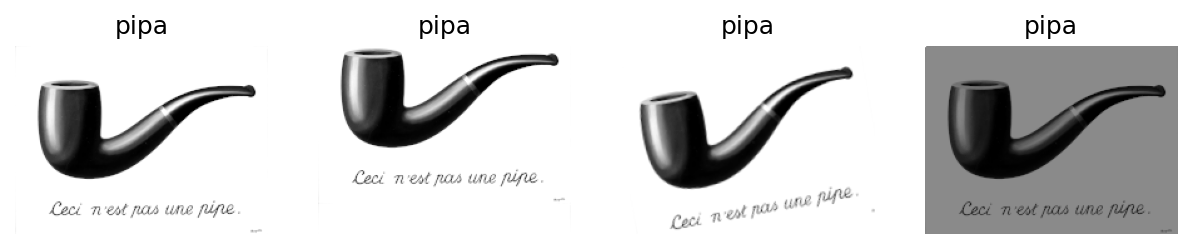

Diferencia  entre original y corrida: 23.0 %
Diferencia  entre original y rotada: 12.0 %
Diferencia  entre original y rotada: 12.0 %
Diferencia  entre original y oscurecida: 50.0 %


In [11]:
from skimage import transform
pipa_corrida = np.roll(pipa,-25,axis=0)
pipa_rotada = transform.rotate((pipa/255).astype(np.float),10,mode='constant',cval=1)
pipa_rotada = (255*pipa_rotada).astype(np.int)
pipa_oscurecida = pipa/2
pipa_oscurecida[0,0] = pipa[0,0]
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.imshow(pipa,cmap="gray") # paleta de grises
plt.title('pipa')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(pipa_corrida,cmap='gray') # paleta de grises
plt.axis('off')
plt.title('pipa')
plt.subplot(1,4,3)
plt.imshow(pipa_rotada,cmap='gray') # paleta de grises
plt.axis('off')
plt.title('pipa')
plt.subplot(1,4,4)
plt.imshow(pipa_oscurecida,cmap='gray') # paleta de grises
plt.axis('off')
plt.title('pipa')
plt.show()
dif_porcentual = np.round(100*np.sum(np.abs(pipa-pipa_corrida))/np.sum(pipa))
print('Diferencia  entre original y corrida:',dif_porcentual,'%')

dif_porcentual = np.round(100*np.sum(np.abs(pipa-pipa_rotada))/np.sum(pipa))
print('Diferencia  entre original y rotada:',dif_porcentual,'%')

dif_porcentual = np.round(100*np.sum(np.abs(pipa-pipa_rotada))/np.sum(pipa))
print('Diferencia  entre original y rotada:',dif_porcentual,'%')

dif_porcentual = np.round(100*np.sum(np.abs(pipa-pipa_oscurecida))/np.sum(pipa))
print('Diferencia  entre original y oscurecida:',dif_porcentual,'%')



---
**Ejercicio**
1.   Se preserva la invarianza en esta representación de la pipa?
1.   Qué otro tipo de invarianzas identifica en el problema?
1.   Piense en algo que sí se preserve en todos los casos
---

El problema anterior puede parecer artificial, pero ha sido un dolor de cabeza para la comunidad de Visión por Computadora por más de 30 años. Nuestra capacidad para identificar un mismo objeto o rostro frente a condiciones muy diversas es enorme (por ejemplo somos capaces de reconocer a alguien a través de un ojo de pez sucio, empañado, de noche).

Sólo se ha podido superar nuestra capacidad, en algunas condiciones, en los últimos 10 años mediante el uso de redes neuronales extremadamente complejas en las cuales la representación del problema es también aprendida de manera automática (más sobre esto más adelente!).

Como contrajemplo, veamos una característica que sí es invariante, al menos en los tres primeros casos.


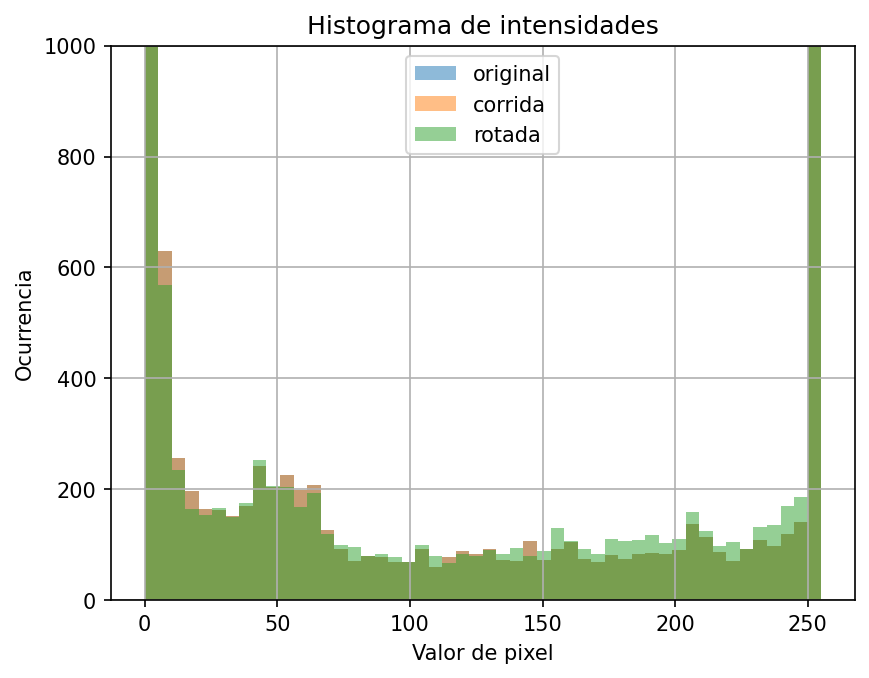

In [12]:
plt.hist(pipa.ravel(),bins=50,alpha=0.5,label='original',)
plt.hist(pipa_corrida.ravel(),bins=50,alpha=0.5,label='corrida')
plt.hist(pipa_rotada.ravel(),bins=50,alpha=0.5,label='rotada')
plt.ylim(0,1000)
plt.grid(True)
plt.legend()
plt.title('Histograma de intensidades')
plt.xlabel('Valor de pixel')
plt.ylabel('Ocurrencia')
plt.show()


# Ejemplo: reconocimiento de números

No podemos dejar pasar este curso sin mencionar al problema [MNIST](https://en.wikipedia.org/wiki/MNIST_database). Se trata de $10000$ pequeñas imágenes en blanco y negro de  dígitos manuscritos del $0$ al $9$; hay $1000$ imágenes de cada dígito.
Precisamente, teniendo en cuenta la fragilidad de las imágenes respecto a rotaciones y traslaciones, la base MNIST está curada de manera que todos los dígitos tienen el mismo tamaño y están centrados y alineados. En estas condiciones, sí es posible, hasta cierto grado, comparar las imágenes directamente en términos de sus pixeles.


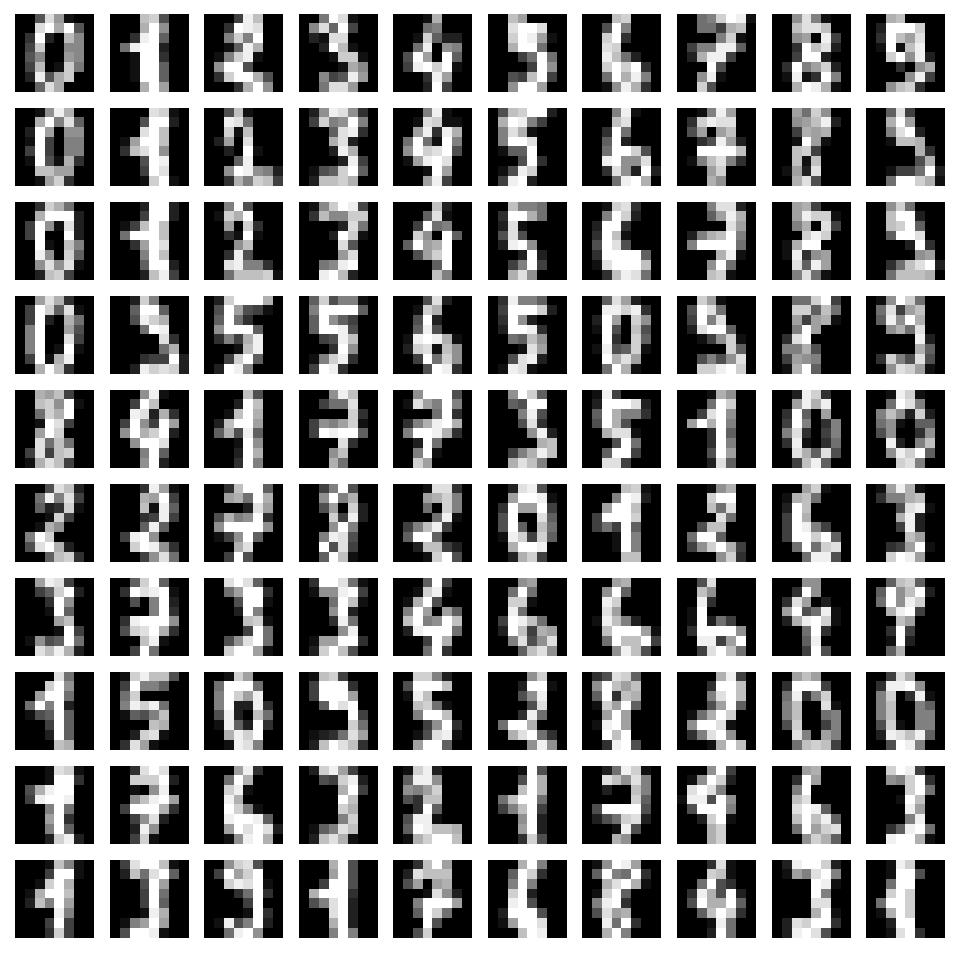



score: 0.99 !!!




In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
y = digits.target
imgs = digits.images

plt.figure(figsize=(8,8))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(imgs[i],cmap='gray')
plt.show()

#
# como siempre, dividimos en entrenamiento y validación
#
X_train,X_test,y_train,y_test = train_test_split(X,y)
#
# creamos el modelo
#
knn = KNeighborsClassifier(n_neighbors=5)
#
# y lo ajustamos a los datos
#
knn.fit(X_train,y_train)
#
# veamos qué tal anda
#
score = knn.score(X_test,y_test)
print("\n=================\n")
print(f"score: {score:.2f} !!!")
print("\n=================\n")


# Pasarela de modelos

Para terminar con este tema, veamos algunos de los tipos de modelo más comunes utilizados para capturar estructura, conocimiento, invarianzas, y otros tipos de conocimiento _a priori_ que podamos tener sobre el problema.

La división no siempre es clara. Hay muchos de estos modelos que pueden interpretarse como de uno u otro tipo. Los ejemplos que veremos son bastante claros, pero no hay que atarse a esta taxonomía.

## Modelos probabilísticos

Como su nombre lo indica, estos modelos construyen una representación probabilística de nuestro conocimiento, y son los que tienen más vínculo con la práctica y la metodología clásica de estadística.

Esto implica representar los datos, ya sea crudos, o características derivadas de ellos, como variables aleatorias en un espacio de probabilidades, lo que básicamente quiere decir que uno puede asignar probabilidades a subconjuntos de ese espacio.

La probabilidad de uno o un conjunto de valores de las variables aleatorias depende de la _elección_ de uno o una familia de distribuciones, paramétricas o no. Un ejemplo clásico es la distribución Normal multivariada. Cuando se trata de clasificación, se suele construir un modelo probabilístico para cada clase.
En ese caso, el proceso de aprendizaje implica ajustar los parámetros de cada distribución en función de los datos de cada clase.

## Naïve Bayes

Veamos un ejemplo de esto sobre los datos que ya vimos, el dataset _Iris_, y de paso mencionemos la familia de modelos probabilísticos más sencilla usada habitualmente: los modelos _Naïve Bayes_. Estos modelos asumen que las distintas características en $X$ son independientes, lo cual facilita mucho construir un modelo probabilístico sobre ellas. Veamos



In [14]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
#
# cargamos los datos de IRIS
#
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target
#
#
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
modelo = GaussianNB()
y_pred = modelo.fit(X_train, y_train).predict(X_test)
score  = modelo.score(X_test,y_test)
print(f"score: {score:.2f}")


score: 0.95


## Modelos funcionales

Los problemas de regresión se expresan naturalmente en términos de modelos funcionales, es decir, el conocimento adquirido se sintetiza en una función, ya sea a través de un conjunto de parámetros (por ejemplo, $a$ y $b$ en un modelo lineal, $y= ax+b$) o bien mediante modelos no paramétricos, como el de los vecinos más cercanos, en donde no hay parámetros _per se_ sino que la función está expresada implícitamente a través de los puntos de entrenamiento.

El siguiente ejemplo muestra un modelo de regresión _local_ basado en _kernels_. La idea es que cada punto de entrenamiento nos dice algo de información en su entorno, y su influencia disminuye a medida que nos alejamos de él. Lo que hacemos entones para inferir el valor de la función en un nuevo punto es tomar en cuenta los puntos cercanos, sopesados por su distancia

Incidentalmente, y sin ánimo de entrar en detalles conceptuales, veremos fugazmente la maquinaria que hay detrás de la construcción de los modelos tal como lo venimos haciendo desde el principio del curso.

25
0.9298668616429295
0.606837534201636
score: 0.57
61


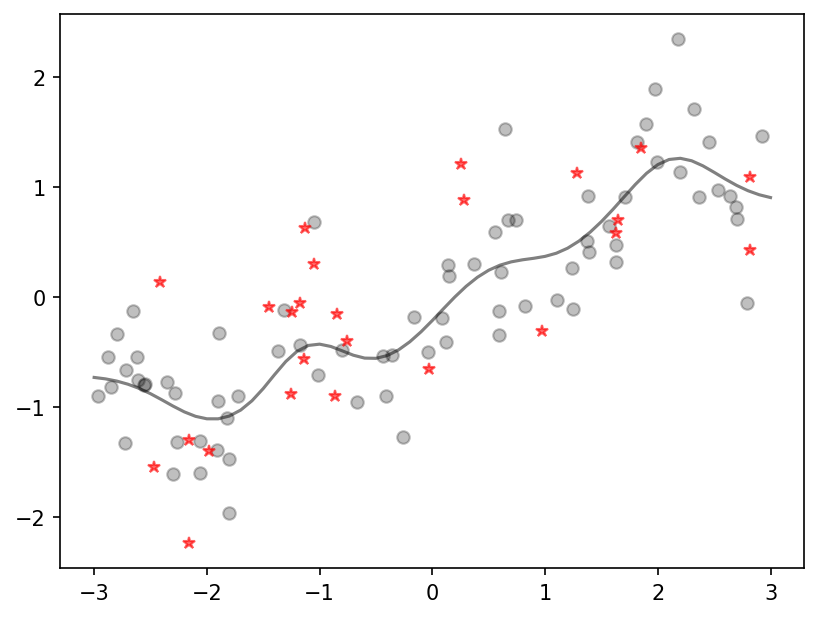

In [15]:
#from sklearn import datasets
from mglearn.datasets import make_wave
from sklearn.model_selection import train_test_split

X,y = make_wave(n_samples=100)


#
# comienzo de definicion de modelo
#
class RegresorLocal:
  '''
  Modelo de regresión local con kernels Gaussianos
  El ancho de los kernels está dado por el parámetro tau
  '''
  def __init__(self,tau):
    self.tau = tau
    self.X = []
    self.y = []


  def fit(self,X,y):
    '''
    el 'entrenamiento' consiste
    simplemente en memorizar los datos de entrenamiento
    '''
    self.X = X
    self.y = y

  def predict(self,Xnew):
    nnew,m = Xnew.shape
    print(nnew)
    n,_    = self.X.shape
    #
    # implementación MUY tonta y MUY ineficiente
    #
    ynew = np.empty(nnew)
    for i in range(nnew):
      norm = 0 # factor de normalización
      Xnewi = Xnew[i,:] # i-esimo nuevo dato
      ynewi = 0 # resultado para i-esimo nuevo dato
      for j in range(n):
        Xj = self.X[j,:] # j-esimo dato de entrenamiento
        yj = self.y[j]   # j-esimo valor de entrenamiento
        wij = np.exp(-np.linalg.norm(Xnewi-Xj)**2/self.tau**2)
        norm += wij
        ynewi += wij * self.y[j]
      ynew[i] = ynewi / norm
    return ynew

  def score(self,Xnew,ytrue):
    ynew = self.predict(Xnew)
    error = ynew-ytrue
    print(np.std(ytrue))
    print(np.std(error))
    R2 = 1 - np.sum(error**2)/np.sum(ytrue**2)
    return R2

#
# fin de definicion de modelo
#

X_train,X_test,y_train,y_test = train_test_split(X,y)

#
# nota: esto crea el modelo creado arriba
#       *nosotros* llamamos a las funciones (fit, score, etc.)
#       de la misma manera que sklearn para que la
#       _interfaz_ fuera _idéntica_
#
regloc = RegresorLocal(tau=0.5)
#
# ajustamos a los datos de entrenamiento
#
regloc.fit(X_train,y_train)
#
# calculamos el score R2
#
score = regloc.score(X_test,y_test)
print(f'score: {score:.2f}')
#
# mostramos la función aprendida por el modelo
# como una curva gris
X_aux = np.arange(-3,3.1,0.1).reshape(1,-1).T
y_aux = regloc.predict(X_aux)
plt.plot(X_aux[:,0],y_aux,color='gray')
#
# dibujamos encima los puntos de entrenamiento como círculos
# transparentes grises
#
plt.plot(X_train[:,0],y_train,'o',color='black',alpha=0.25)
#
# y los puntos de test en rojo
#
plt.plot(X_test[:,0],y_test,'*',color='red',alpha=0.6)
plt.show()

---

**Ejercicio**

Pruebe cambiar el valor de la variable `tau` para obtener distintas aproximaciones.

---

## Modelos de grafos

Otra forma muy común, utilizada sobre todo cuando el conocimiento del problema se codifica como relaciones entre variables o factores, es el de grafos.

Los grafos son estructuras de datos formadas por _nodos_ y _vértices_. Un par de nodos cualquiera en el grafo puede o no estar conectado por un vértice. Los nodos pueden tener un valor asociado (por ejemplo, una medida, como una temperatura) y los vértices a su vez también pueden tener un valor o _peso_ que indica el grado de _conectividad_ entre dos nodos.

Este tipo de estructuras son muy comunes para analizar redes de datos o redes sociales en donde los nodos son personas y un vértice entre dos personas indica que se conocen, o son amigos, o algo similar.

Sin embargo, hay muchos otros casos en donde los modelos de grafo son de gran utilidad.

Abajo vemos un pequeño ejemplo, y vemos la forma usual en que suelen ser representados los grafos para su manipulación mediante algoritmos de aprendizaje automático.


[[0 1 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 1 1]
 [0 0 0 0 1 1 0 0 1 1]
 [0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 1 1 0 0 1]
 [0 1 0 0 0 1 1 0 1 0]
 [1 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 1 0 0 0 1]
 [0 1 1 1 0 0 0 0 1 1]
 [0 1 1 0 0 0 0 0 1 0]]


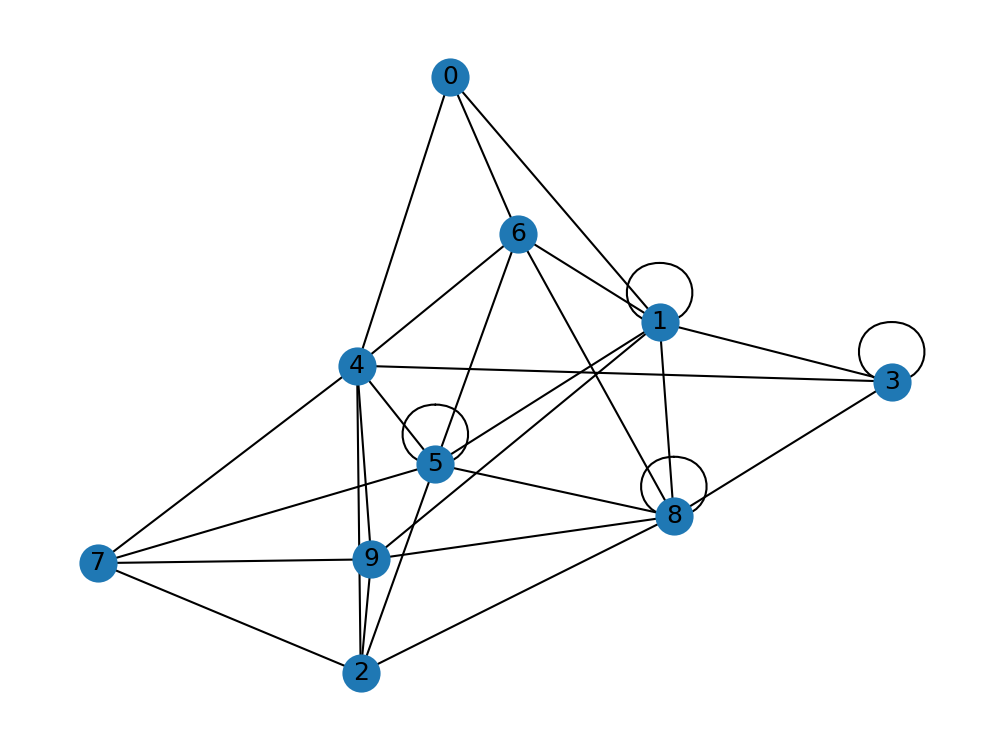

In [16]:
# SKLearn no tiene manejo de grafos
# para eso usamos el paquete NetworkX
#
import networkx as nx
import numpy.random as rng
#
# creamos una matriz de adyacencia al azar
# un valor distinto de 0 en la fila i, columna j
# indica que los nodos i y j se conectan por una arista
#
A = 1*(rng.rand(10,10) > 0.6)
print(A)
#
# creamos el grafo a partir de la matriz de adyacencia
#
G = nx.from_numpy_array(np.array(A))
#
# mostramos el grafo
#
nx.draw(G, with_labels=True)